# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [7]:
import pandas as pd

dataset = pd.read_csv('advertising.csv')

dataset.head()

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

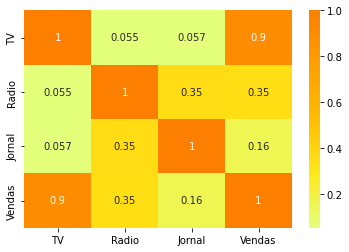

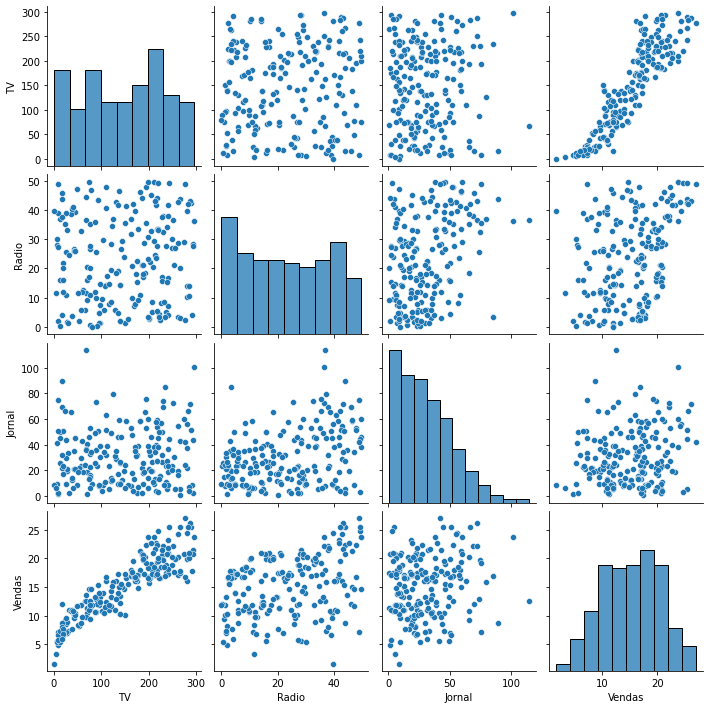

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(dataset.corr(), cmap="Wistia", annot=True)

sns.pairplot(dataset);

# A correlação da TV com as Vendas é grande

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [20]:
X = dataset.drop('Vendas', axis=1)
y = dataset['Vendas']

In [37]:
from sklearn.model_selection import train_test_split

X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.3)

#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

modelo_lr = LinearRegression()
modelo_rf = RandomForestRegressor()

In [39]:
modelo_lr.fit(X_treinamento, y_treinamento)
modelo_rf.fit(X_treinamento, y_treinamento)

RandomForestRegressor()

In [40]:
previsoes_lr = modelo_lr.predict(X_teste)
previsoes_rf = modelo_rf.predict(X_teste)

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [43]:
from sklearn.metrics import r2_score

print(r2_score(y_teste, previsoes_lr))
print(r2_score(y_teste, previsoes_rf))

0.9089434437691797
0.9433123862288679


#### Visualização Gráfica das Previsões

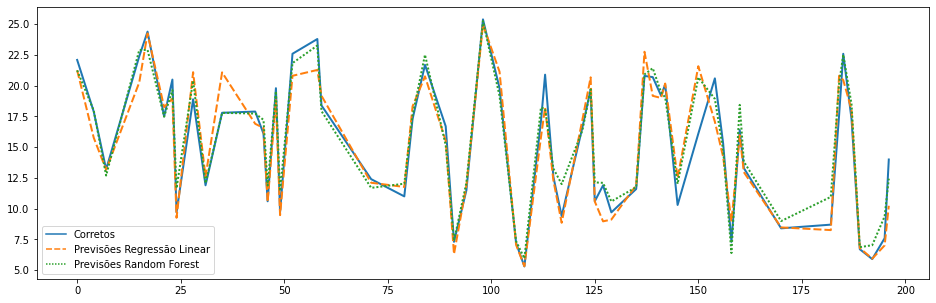

In [57]:
tabela = pd.DataFrame()
tabela['Corretos'] = y_teste
tabela['Previsões Regressão Linear'] = previsoes_lr
tabela['Previsões Random Forest'] = previsoes_rf

plt.figure(figsize=(16,5))
sns.lineplot(data=tabela, linewidth=2)
plt.show()

#### Como fazer uma nova previsão?

In [59]:
new_dataset = pd.read_csv('novos.csv')
display(new_dataset)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [62]:
previsoes_rf_new = modelo_rf.predict(new_dataset)
print(previsoes_rf_new)

[ 7.53   9.288 20.636]


In [ ]:
modelo_previsao = quando a Bianca vai me beijar